In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)


rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
car = pd.read_csv('./datas/model_data_v2.csv')
models = pd.read_csv('./datas/model.csv')
query = pd.read_csv('./datas/naver_query.csv')

In [4]:
# 전처리
car.rename(columns={"SHARES(%)":"SHARES","E-D(CC)":"CC" }, inplace=True)

car_total = car[car['BRAND'].str.contains('Total')]
car = car.drop(car[car['BRAND'].str.contains('Total')].index)


brand_except = ['Chevrolet','Bentley','Rolls-Royce','Lamborghini']
for a in brand_except:
    idx_num = car[car['BRAND'] == a].index
    car = car.drop(idx_num)


model_except = ['Q30 2.2d','918 Spyder','LC500 Convertible','S 350 BlueTEC 4MATIC']
for a in model_except:
    idx_num = car[car['MODEL'] == a].index
    car = car.drop(idx_num)
    
# 데이터타입 변경
car['YEAR'] = car['YEAR'].astype(object)
car['MONTH'] = car['MONTH'].astype(object)
car['PRICE'] = car['PRICE'].astype(int)
car['CC'] = car['CC'].astype(int)


#년월컬럼frt
car['year_month'] = car['YEAR'].map(str) + "-"+ car['MONTH'].map(str)

---

---

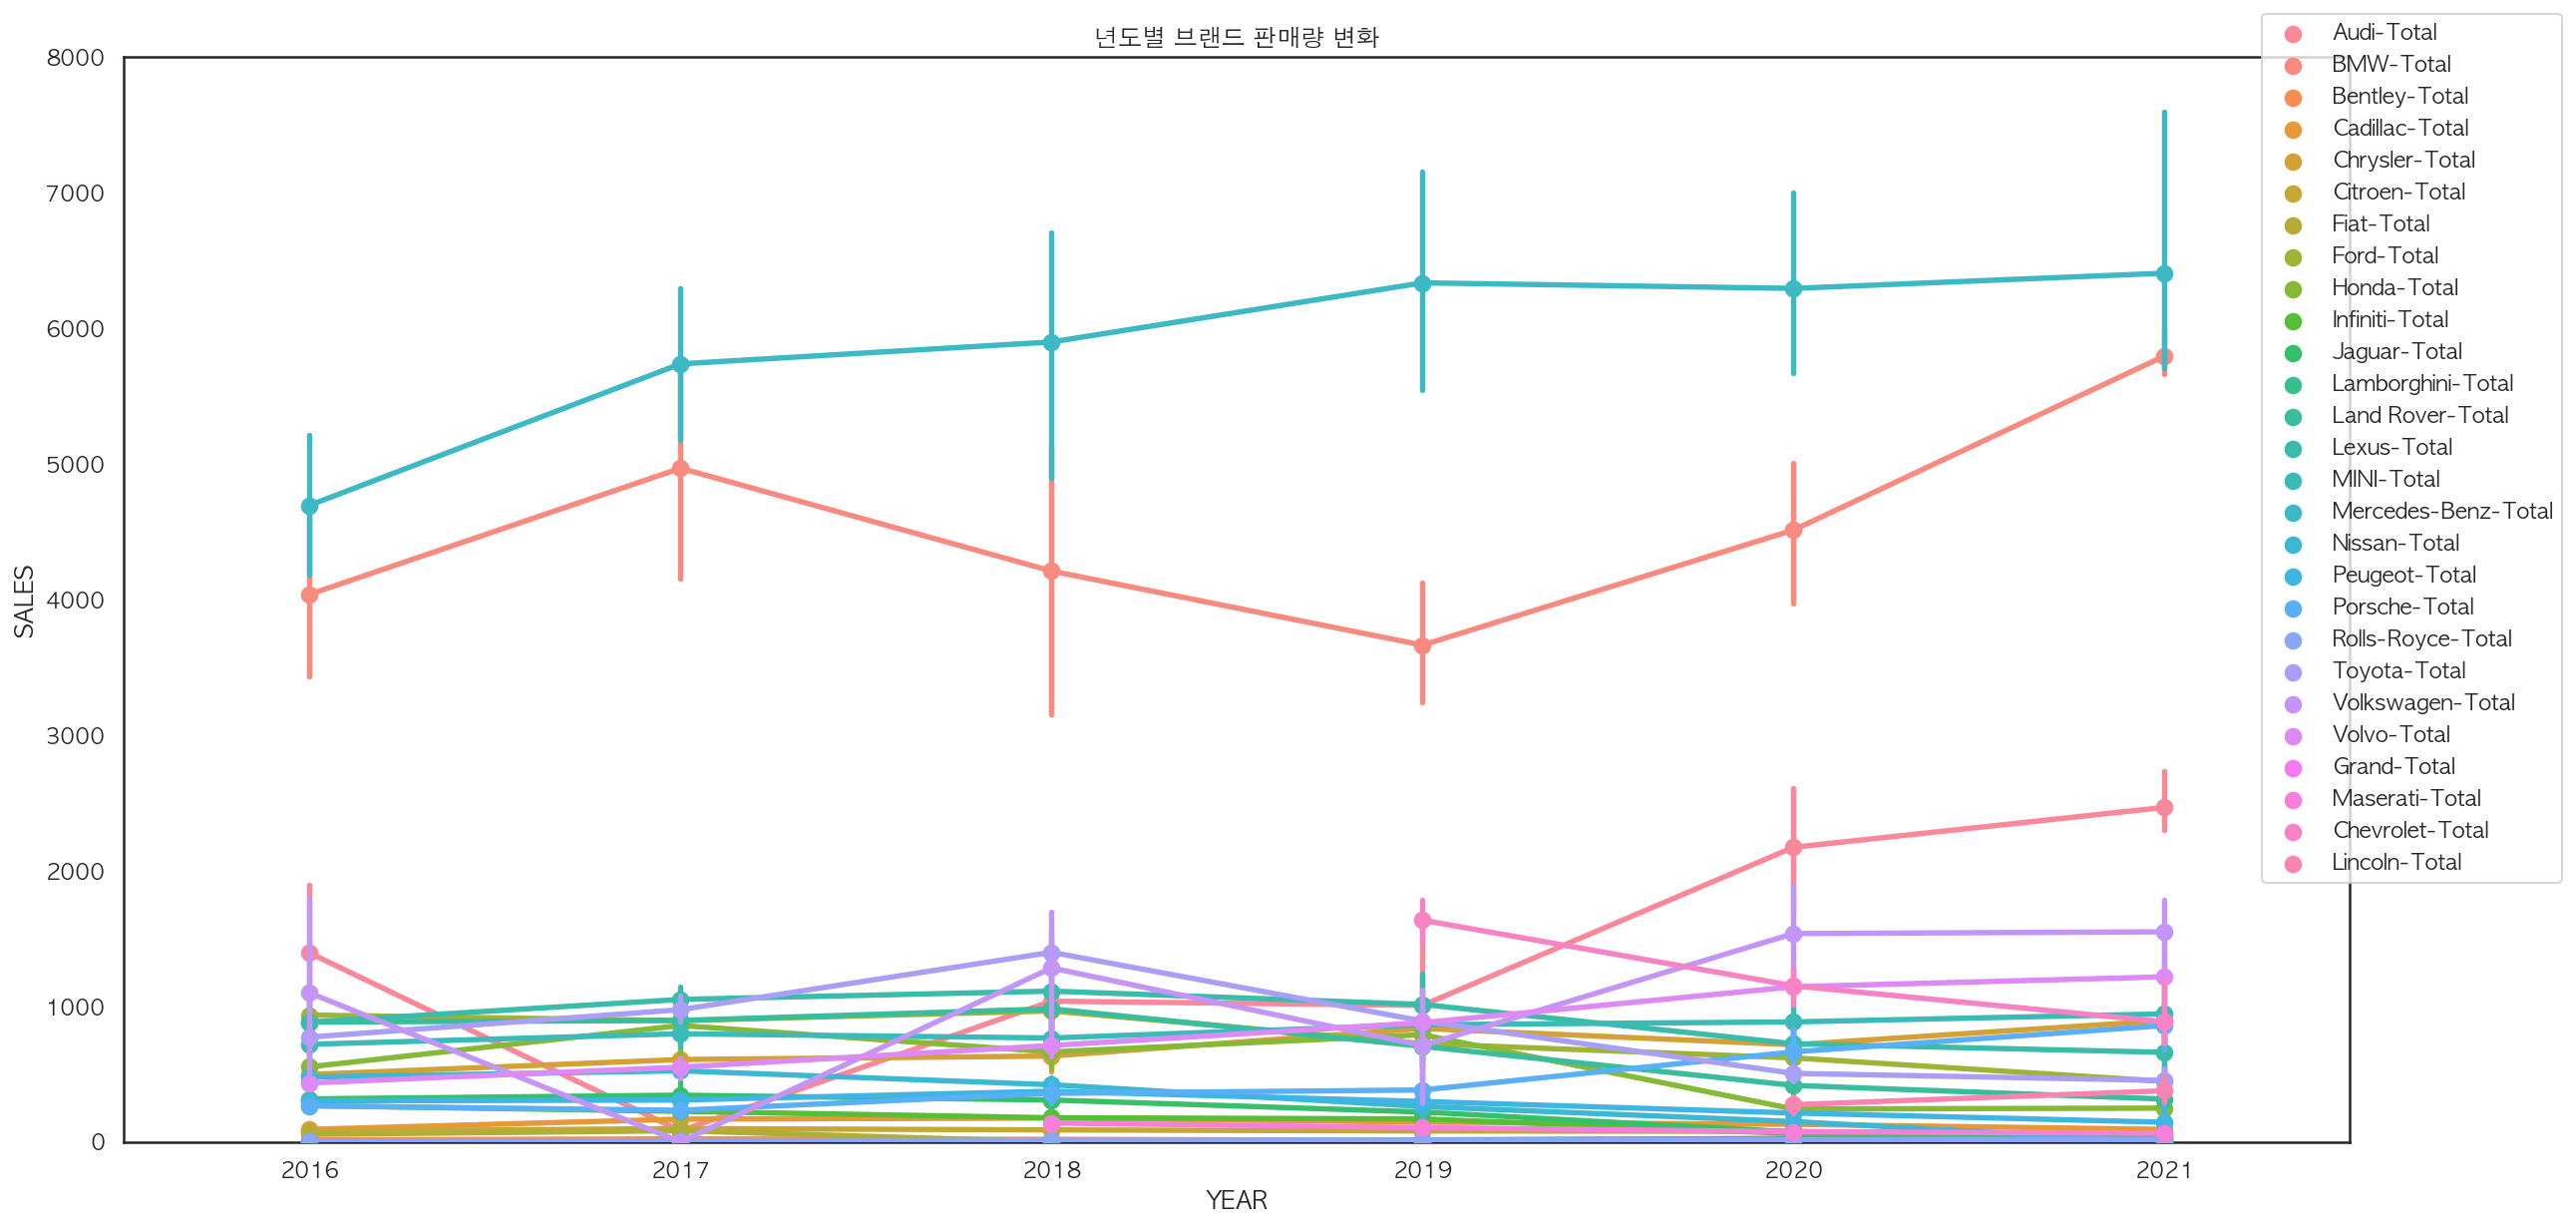

In [5]:
# 년도별 브랜드 판매량 변화

plt.figure(figsize=(20,10))
sns.pointplot(x='YEAR',y='SALES',hue='BRAND',data=car_total)
plt.title('년도별 브랜드 판매량 변화')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylim(0,8000)
plt.show()

In [6]:
# 벤츠의 모델별 평균 시장점유율
benz = car[car['BRAND']=='Mercedes-Benz']
benz.groupby('MODEL').mean().sort_values('SHARES',ascending=False).head(15)

,CC,PRICE,SALES,SHARES
MODEL,,,,
E 250,1991.0000,64300.000000,941.500000,3.768333
E 300 4MATIC,2085.1875,82800.000000,620.031250,3.058594
E 300,1991.0000,77000.000000,569.187500,2.924531
E 220 d,1950.0000,68915.789474,380.824561,1.956316
E 220 d 4MATIC,1950.0000,75020.000000,300.900000,1.412800
A 220 sedan,1991.0000,41400.000000,304.285714,1.332857
GLC 300 4MATIC Coupe,1991.0000,78853.846154,250.500000,1.274615
GLB 250 4MATIC,1991.0000,61314.285714,305.857143,1.262857
GLC 300 e 4MATIC Coupe,1991.0000,80733.333333,328.666667,1.238333


In [7]:
# 국내에서 가장 잘 팔리는 벤츠 모델은 e클래스

In [8]:
# 벤츠 및 경쟁사 쿼리량 분석

In [9]:
# 국내 외제차 시장점유율 상위 7브랜드
car_total.groupby('BRAND').mean().sort_values('SHARES',ascending=False).head(8)

,YEAR,MONTH,SALES,SHARES
BRAND,,,,
Grand-Total,2018.171875,6.218750,20774.703125,100.000000
Mercedes-Benz-Total,2018.171875,6.218750,5829.531250,28.055312
BMW-Total,2018.171875,6.218750,4353.500000,20.835781
Audi-Total,2018.142857,6.285714,1201.142857,5.564603
Chevrolet-Total,2020.055556,6.055556,1160.388889,5.128889
Lexus-Total,2018.171875,6.218750,938.734375,4.600000
Volkswagen-Total,2018.171875,6.218750,964.062500,4.453594
Toyota-Total,2018.171875,6.218750,880.468750,4.307031


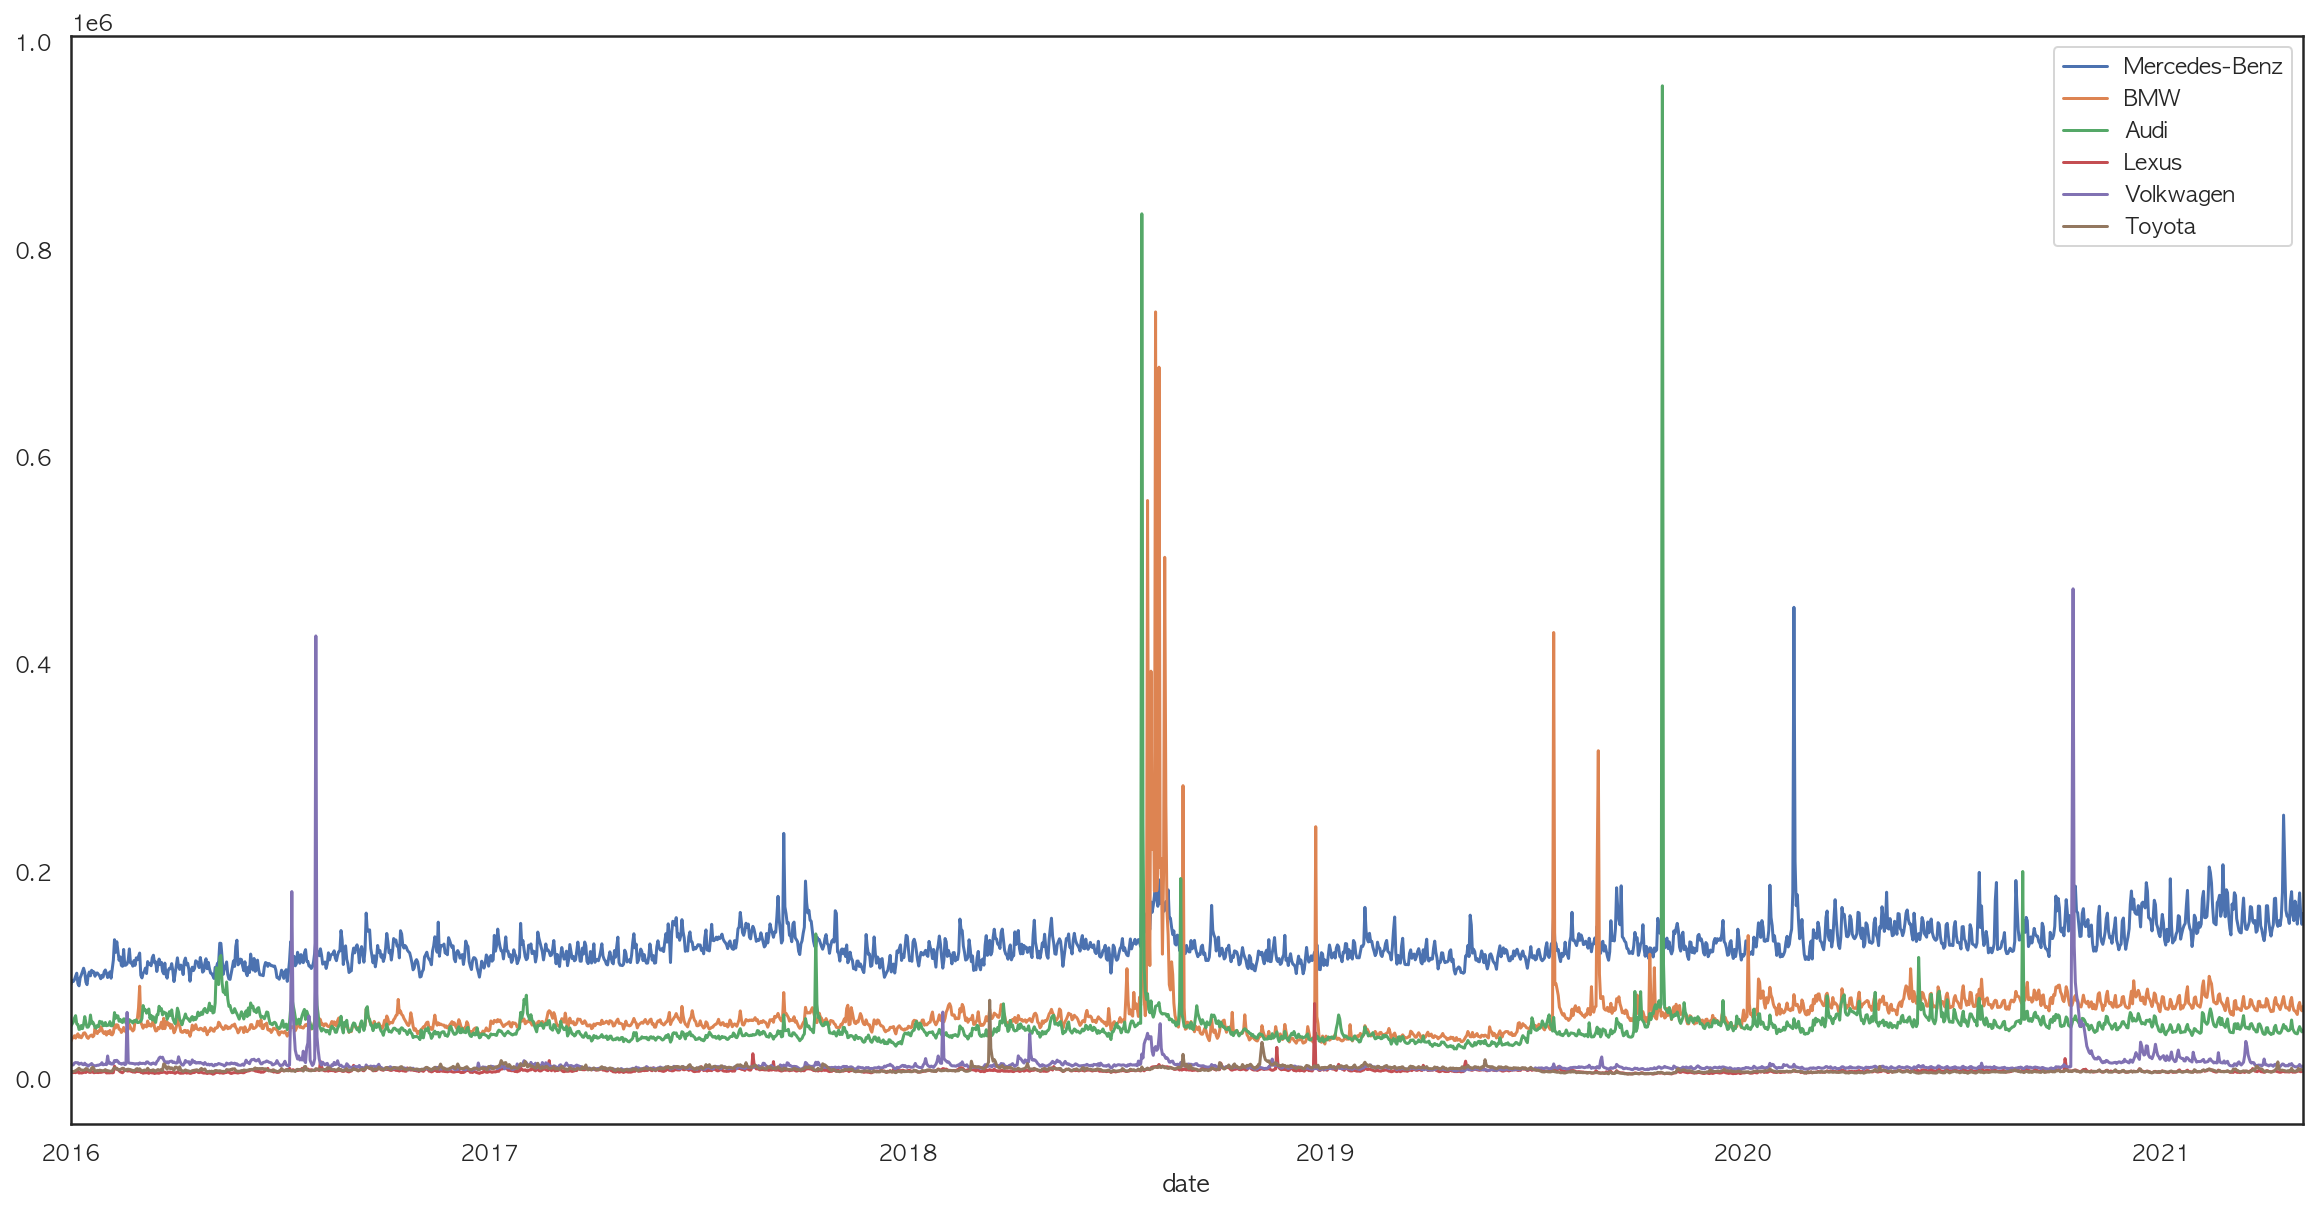

In [10]:
query['date'] = pd.to_datetime(query['date'])
query.index = query["date"]
query.set_index('date', inplace=True)
query

share_king = ['Mercedes-Benz','BMW','Audi','Lexus','Volkwagen','Toyota']
plt.figure(figsize=(20,10))
for a in share_king:
    query[a].plot()
    plt.legend(['Mercedes-Benz','BMW','Audi','Lexus','Volkwagen','Toyota'])
    plt.grid

plt.show()

In [11]:
#벤츠가 타사대비 압도적으로 많은 쿼리량을 보임.
# 2018년 bmw와 아우디의 쿼리량 급등은 bmw520d의결함문제로 인한 연쇄화재사건때문으로 보임.
# 2016년 폭스바겐은 디젤게이트로 쿼리량이 급증한 것을 확인할 수 있다.
# 이를 통해 알 수 있듯, 쿼리량에는 브랜드에 대한 긍정적, 부정적반응, 선호, 비선호가 모두 반영됨.

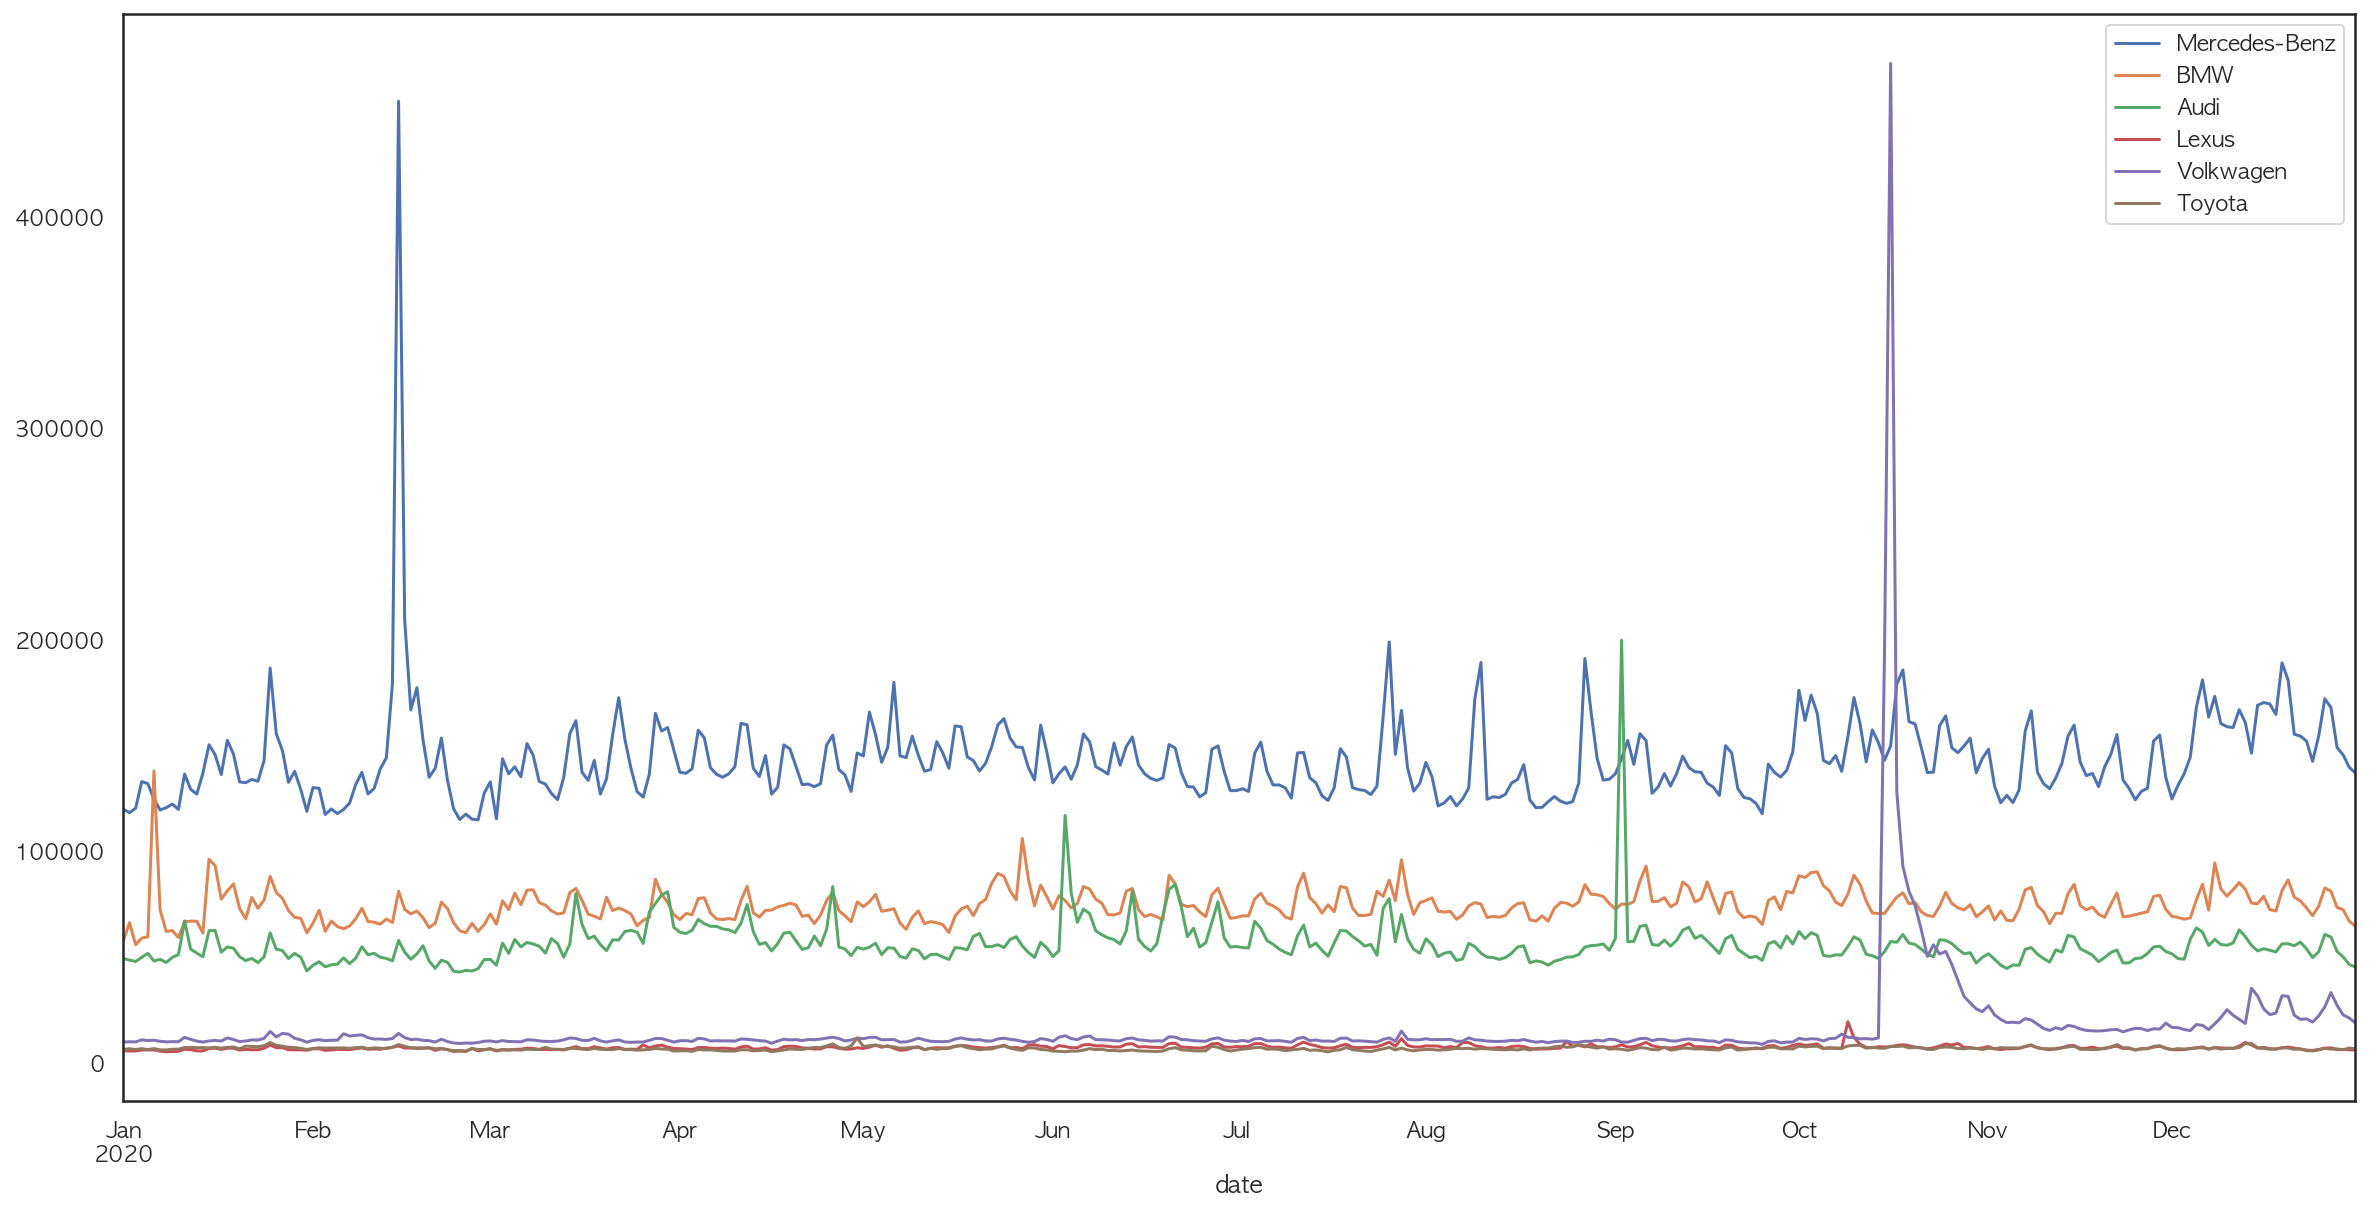

In [12]:
# 2020-21년의 데이터만으로 다시 그려봄

query_cor = query[(query['Year']==2020)]

share_king = ['Mercedes-Benz','BMW','Audi','Lexus','Volkwagen','Toyota']
plt.figure(figsize=(20,10))
for a in share_king:
    query_cor[a].plot()
    plt.legend(['Mercedes-Benz','BMW','Audi','Lexus','Volkwagen','Toyota'])
    plt.grid

plt.show()

In [13]:
# grp와 도달률을 높였을 때 쿼리량이 늘어나는지 확인하기 위해 그렸으나 브랜드를 불문하고 광고횟수와 도달률과 상관없이 전반적으로 일정한 쿼리량을 보여줌.
# 브랜드에 대한 검색량을 광고의 효과를 판단하는 지표로 사용하는 것이 적절한 지에 대한 고민 필요.

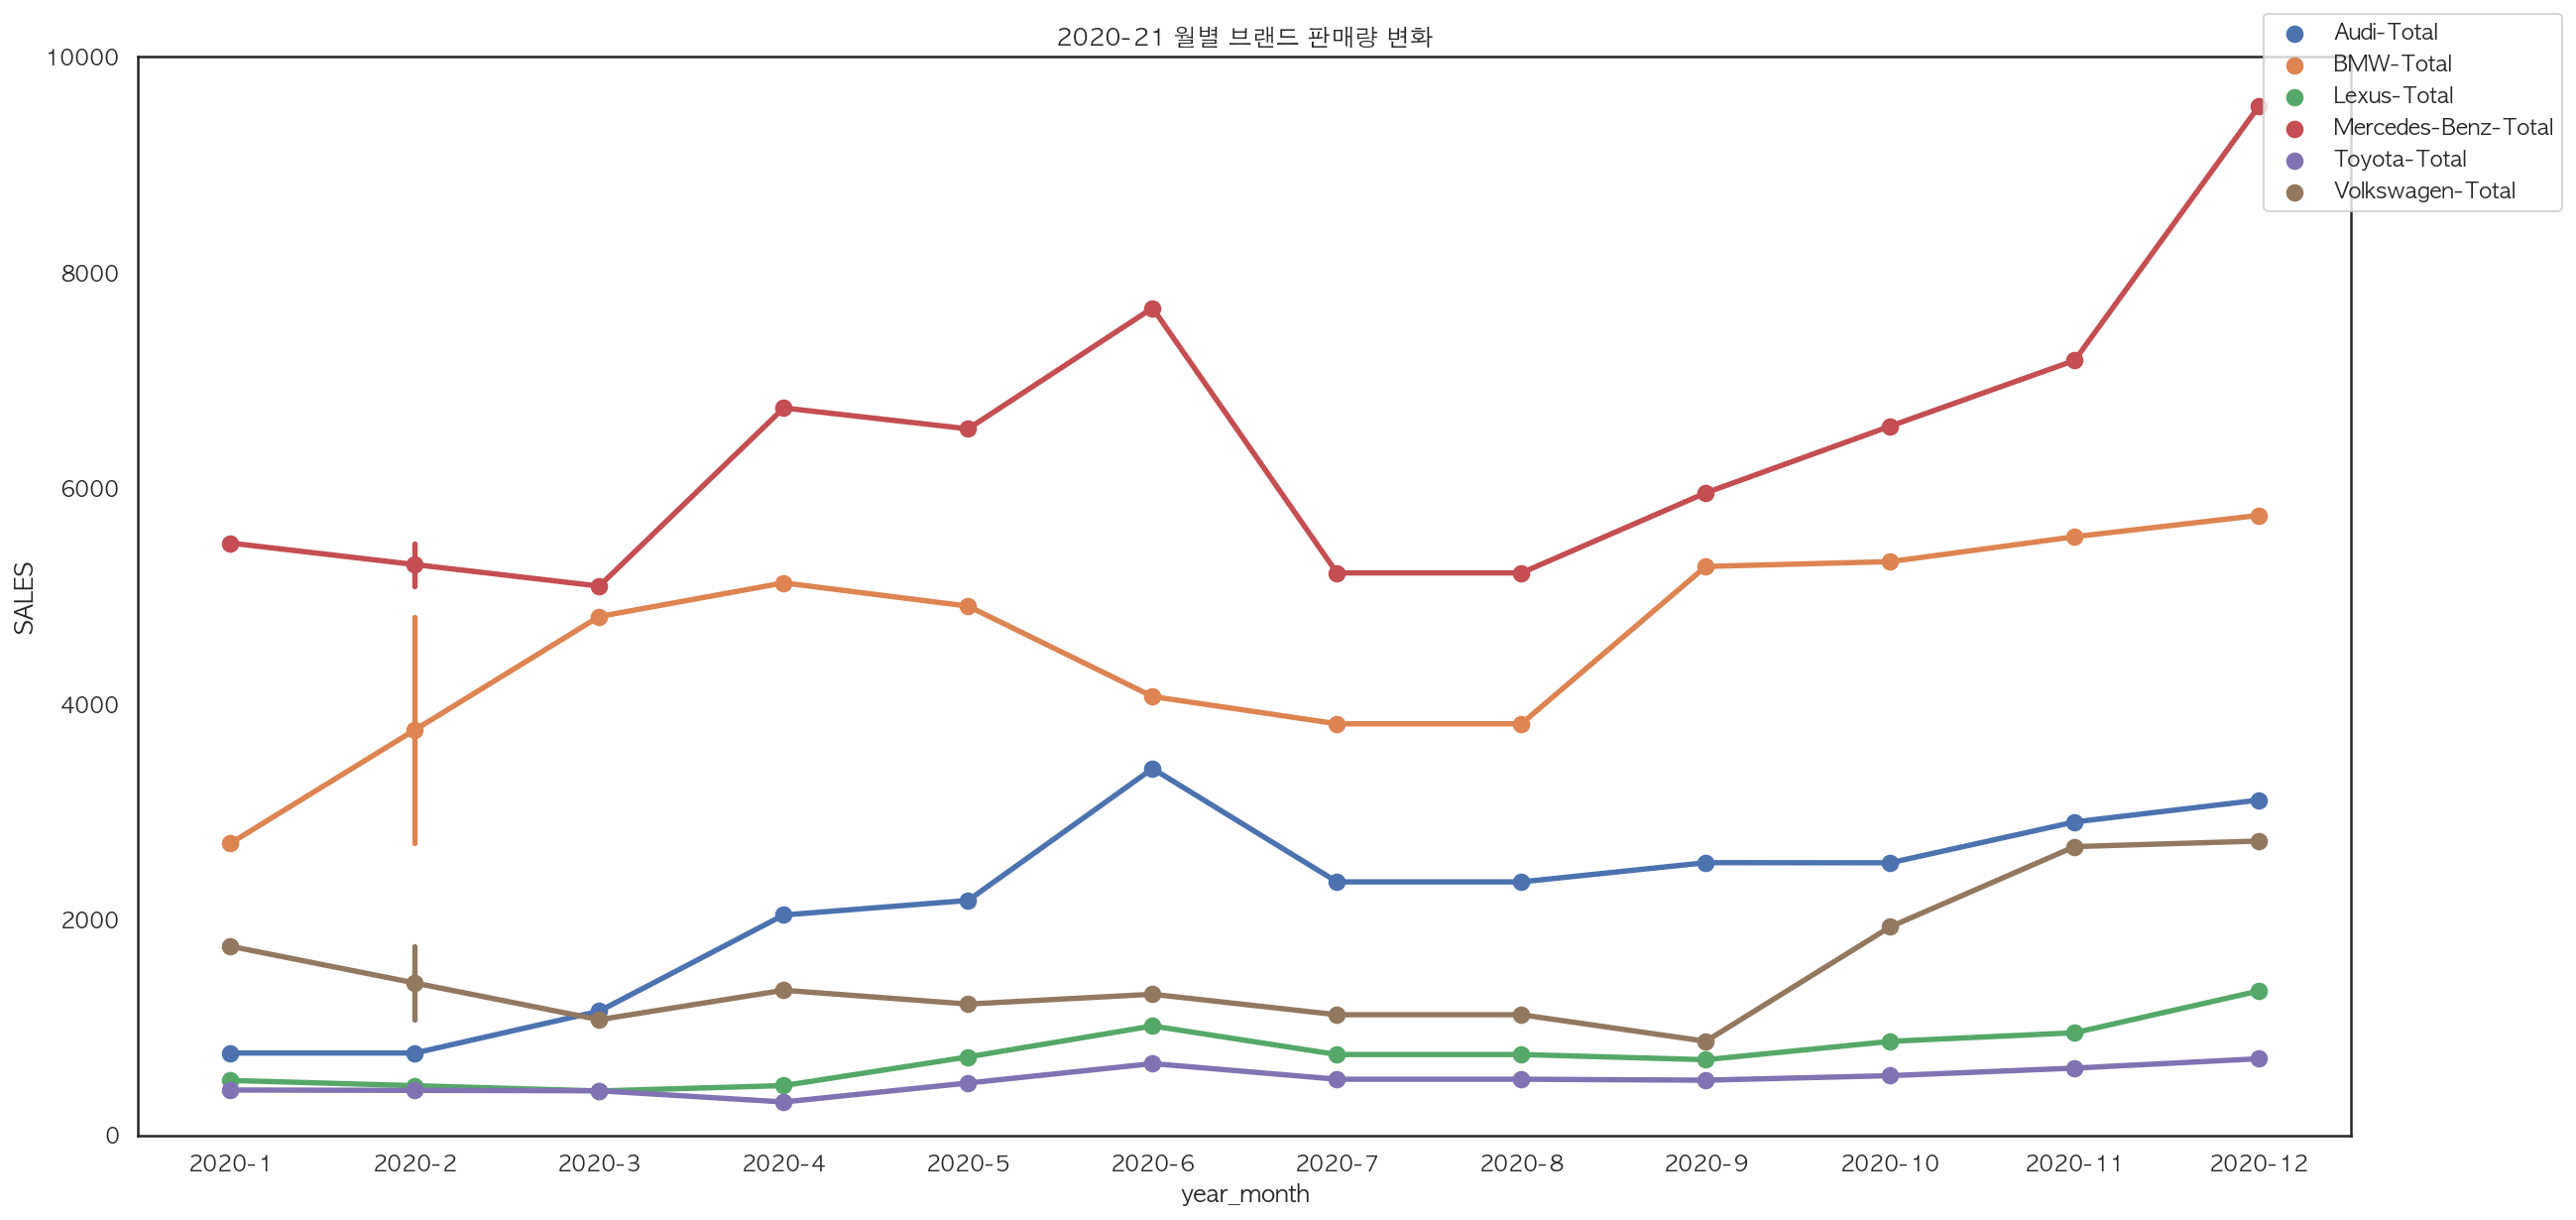

In [14]:
car_total['year_month'] = car_total['YEAR'].map(str) + "-"+ car_total['MONTH'].map(str)
car_cor = car_total[(car_total['YEAR']==2020)]

exc = [ 'Cadillac-Total', 'Chrysler-Total', 'Citroen-Total', 'Ford-Total', 'Honda-Total',
       'Infiniti-Total', 'Jaguar-Total', 'Land Rover-Total',  'Lincoln-Total', 'MINI-Total',
       'Maserati-Total',  'Nissan-Total', 'Peugeot-Total', 'Porsche-Total',
        'Volvo-Total', 'Landrover-Total','Bentley-Total','Chevrolet-Total','Lamborghini-Total','Rolls-Royce-Total',
      'Grand-Total']

for a in exc:
    idx_num = car_cor[car_cor['MODEL'] == a].index
    car_cor = car_cor.drop(idx_num)

plt.figure(figsize=(20,10))
sns.pointplot(x='year_month',y='SALES',hue='BRAND',data=car_cor)
plt.title('2020-21 월별 브랜드 판매량 변화')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylim(0,10000)
plt.show()

In [15]:
# 판매량 그래프에서는 쿼리량그래프와 다르게 특정시기에 집행한 광고의 효과가 나타나는 것을 확인할 수 있다.
# Tv광고 grp데이터셋에 따르면,
# 벤츠는 2-5월, 9-12월에 광고를 집중하였는데, 해당시기에 판매량이 상승하는 것을 확인할 수 있다.
# bmw는 1월-5월, 9월-12월에 광고를 집중했는데, 해당 시기에 판매량이 상승하는 것을 확인할 수 있음.